<a href="https://colab.research.google.com/github/sakshikutriyar/TumorDetection/blob/main/tumor_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Adding dataset to the system

In [ ]:
!unzip brain_tumor_dataset.zip

# **Importing tensorflow checking cuda availability and GPUs availability**

In [ ]:
import tensorflow
print("Tensorflow Version: ", tensorflow.__version__)
print("Cuda Availability: ", tensorflow.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Tensorflow Version:  2.5.0
Cuda Availability:  True
Num GPUs Available:  1


## IMPORTING LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import skimage.io 

import os 
from tqdm import tqdm
 

from skimage.io import imread, imshow 
from skimage.transform import resize
from skimage.color import rgb2gray 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, ZeroPadding2D, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline



## IMPORTING / VIEWING / PRE-PROCESSING DATASET

In [ ]:
# Importing Dataset
tumores = os.listdir('brain_tumor_dataset/yes')
non_tumores = os.listdir('brain_tumor_dataset/no')


### VIEWING DATASET - TUMORES

100%|██████████| 5/5 [00:00<00:00, 32.95it/s]


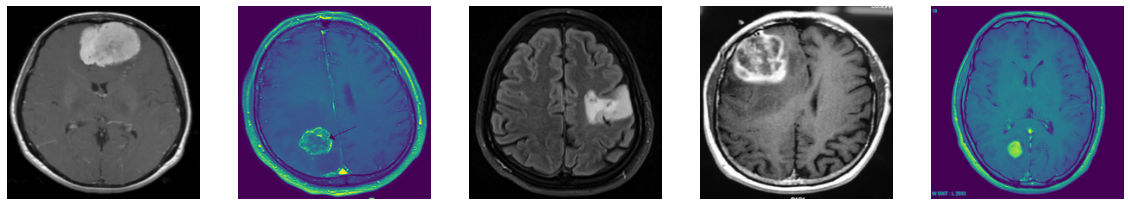

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))


for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(tumores))
    img  = imread('brain_tumor_dataset/yes/' + tumores[rand])
    img  = resize(img, (224,224))
    ax[i].imshow(img)
    ax[i].axis('off')

### VIEWING DATASET - NON-TUMORES

100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


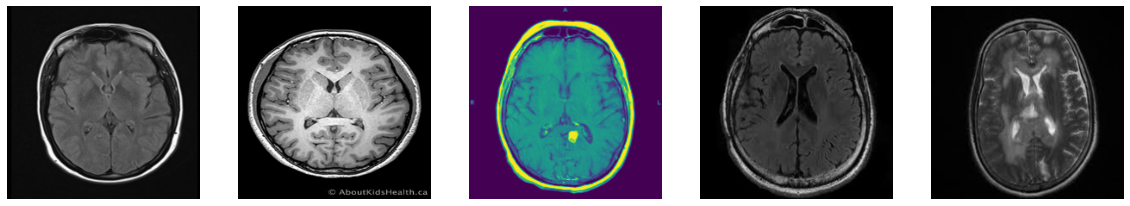

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(non_tumores))
    img  = imread('brain_tumor_dataset/no/' + non_tumores[rand])
    img  = resize(img, (224,224))
    ax[i].imshow(img)
    ax[i].axis('off')

#### CONVERTING IMAGES INTO PROPER SHAPE AND STORING THEM INTO AS AN ARRAY

In [ ]:

Image = []
Label = []

for i in tqdm(range(0, len(tumores))):
    img = imread('brain_tumor_dataset/yes/' + tumores[i])
    img = resize(img, (224, 224, 3))
    Image.append(img)
    Label.append(1)


for i in tqdm(range(0, len(non_tumores))):
    img = imread('brain_tumor_dataset/no/' + non_tumores[i])
    img = resize(img, (224, 224, 3))
    Image.append(img)
    Label.append(0)
    
Image = np.array(Image)
Label = np.array(Label)

100%|██████████| 98/98 [00:03<00:00, 26.12it/s]


In [ ]:
# Normalizing
Image.min(), Image.max()

(0.0, 1.0)

#### SHUFFLE THE DATA AND RESULTS ARE APPENDED

In [ ]:
Image, Label = shuffle(Image, Label, random_state = 42)

## VIEWING IMAGE - AFTER SHUFFLE

100%|██████████| 5/5 [00:00<00:00, 507.31it/s]


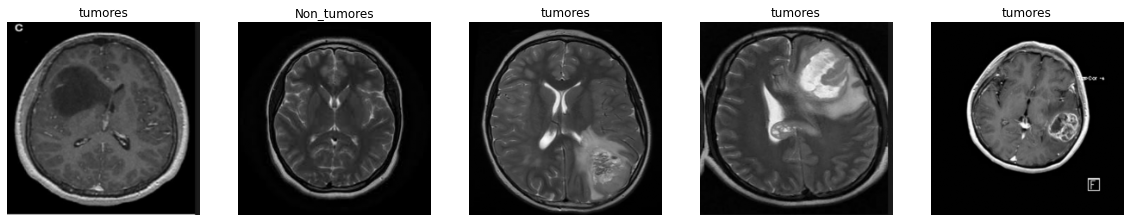

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('tumores')
    else:
        ax[i].set_title('Non_tumores')

#### ASSIGNING IMAGES ANS LABEL TO NEW VARIABLE

In [ ]:
X = Image
y = Label

## SPLITTING DATA - TRIANING & VALIDATION

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# CHECKING SHAPE
X_train.shape, X_val.shape

((177, 224, 224, 3), (76, 224, 224, 3))

## DATA AUGUMENTAION

##### CREARTING AUGUMENTATION OBJECT

In [ ]:
train_datagen  = ImageDataGenerator(rescale = 1./255,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    rotation_range = 30,
                                    fill_mode = 'nearest',
                                    zoom_range = 0.2,
                                    shear_range = 0.2)

# Fitting to train data 
train_datagen.fit(X_train)


# MODEL BUILDING

In [ ]:
model = Sequential()

##### BUILDING LAYERS

In [ ]:
# Input Layer 
model.add(InputLayer(input_shape = (224,224,3)))

# Adding Zero Padding
model.add(ZeroPadding2D((2,2), data_format = 'channels_last'))
# model.add(Conv2D(96, (11, 11), strides=(3, 3), padding='valid', activation='relu',data_format = "channels_first"))

# Adding Layers
model.add(Conv2D(filters = 32,  kernel_size  = (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64,  kernel_size  = (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))

# Adding Flatten
model.add(Flatten())


# Adding Dense-FCC
model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Adding Output 
model.add(Dense(units = 1, activation = 'sigmoid'))

#### MODEL SUMMERY

In [ ]:
# Checking Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 113, 113, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 113, 113, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 64)       

## MODEL COMPILE

In [ ]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

### DEFINING CALLBACKS

In [ ]:
filepath = 'best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

## MODEL RUN

In [ ]:
model.fit(train_datagen.flow(X_train, y_train, batch_size = 32),
          validation_data = (X_val, y_val),
          epochs = 500,
          verbose = 1,
          callbacks = callback_list)

Epoch 1/500
6/6 [==============================] - 33s 295ms/step - loss: 0.8809 - accuracy: 0.5367 - val_loss: 0.6945 - val_accuracy: 0.4605

Epoch 00001: val_accuracy improved from -inf to 0.46053, saving model to best_weights.hdf5
Epoch 2/500
6/6 [==============================] - 2s 289ms/step - loss: 0.8255 - accuracy: 0.6045 - val_loss: 0.6832 - val_accuracy: 0.6974

Epoch 00002: val_accuracy improved from 0.46053 to 0.69737, saving model to best_weights.hdf5
Epoch 3/500
6/6 [==============================] - 2s 288ms/step - loss: 0.8629 - accuracy: 0.5367 - val_loss: 0.6751 - val_accuracy: 0.6974

Epoch 00003: val_accuracy did not improve from 0.69737
Epoch 4/500
6/6 [==============================] - 2s 288ms/step - loss: 0.8140 - accuracy: 0.5989 - val_loss: 0.6687 - val_accuracy: 0.6842

Epoch 00004: val_accuracy did not improve from 0.69737
Epoch 5/500
6/6 [==============================] - 2s 293ms/step - loss: 0.8455 - accuracy: 0.5819 - val_loss: 0.6643 - val_accuracy: 0.

# MODEL PREDICTION

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


tumores Cell


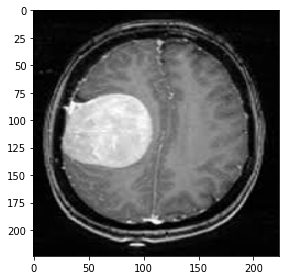

In [ ]:
#image = imread('brain_tumor_dataset/no/11 no.jpg')
image = imread('brain_tumor_dataset/yes/Y1.jpg')
image = resize(image, (224,224,3))
imshow(image)
image = np.expand_dims(image, 0)

prediction  = model.predict_classes(image)

if prediction[0][0] == 1:
    print("tumores Cell")
else:
    print("Non-tumores Cell")